## Write your headlines first
## practice your two line pitch
## then write subheaders & sketch out story

## List of databases I'm working with:

#### megis_one : #from here: http://www.maine.gov/megis/catalog/ downloaded shapefile
...after speaking to someone at MCHT realized that it was missing info.

Contacted Bob Bistrais at MEGIS bob.bistrais@maine.gov who sent over the new, unpublished file,
which I called 

#### megis_two







In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps
import requests
from bs4 import BeautifulSoup
# from selenium import webdriver
# driver = webdriver.Chrome()

%matplotlib inline

## MEGIS  
(#from here: http://www.maine.gov/megis/catalog/) has a shapefile of Conserved Lands in Maine. Let's look at it.


Data Dictionary info that's relevant:


    ACQ_YEAR: acquisition year
    CALC_AC : calculated acreage
    DESIGNATIO : designation (easement, sanctuary, etc.)
    HOLD1_NAME : manager
    HOLD1_TYPE : state/private
    PARCEL_NAM : name of the preserve/parcel/easement
    geometry : polygon = shape of holding
 

In [2]:
#from here: http://www.maine.gov/megis/catalog/
megis_one = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/conserved_landss/conserved_lands.shp')

In [3]:
pd.set_option("display.max_columns", 100)
megis_one.head(100)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
0,None,,,26.857197,787,,,,,,,,None,,,,,,,,,,,,Contact landowner for additional information,,,,0.000,"POLYGON ((463512.4724000003 5027491.558599999,..."
1,None,1965,,8.314696,1,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,2,The Nature Conservancy,Private,,,,,,MEFO File Survey; CAP,,La Verna Preserve,"Allowed for general uses, contact owner for de...",Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
2,None,,,52.293330,2,Fee,,,,,,,None,4,Maine Department of Transportation,State,,,,,,Roadside Rest Area,ASH HILL,ASH HILL SCENIC AREA,Contact landowner for additional information,,,,52.292,"POLYGON ((542053.9376999997 5089059.000499999,..."
3,1993-12-27,1993,,247.049757,3,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,1,The Nature Conservancy,Private,,,,,,MEFO File Survey,,Saco Heath Preserve,Contact landowner for additional information,Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((381291.2644999996 4824393.9134, 3813..."
4,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999996 5140590.4999, 4923..."
5,None,2001,,0.084249,5,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.085,"POLYGON ((531716.8749000002 5134688.4998, 5317..."
6,1989-09-06,1989,,30.675615,6,Easement,,,Conservation Easement,,Chris Cabot,"put-copies selected features, coordinate infor...",2009-07-16,3,Maine Department of Inland Fisheries and Wildlife,State,,,0013001,,,Digitized boundaries from georeferenced 1973 s...,McBurnie Property,Conant Brook,Contact landowner for additional information,,,,37.000,"POLYGON ((583480.4373000003 5176787.9998, 5834..."
7,None,2001,,0.025927,7,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.027,"POLYGON ((479938.0630000001 5139478.500600001,..."
8,None,2001,,0.063186,8,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.065,"POLYGON ((480570.1564999996 5138042.000600001,..."
9,None,2001,,0.535307,9,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.535,"POLYGON ((480686.8128000004 5139087.500299999,..."


In [9]:
grouped = megis_one.groupby('HOLD1_TYPE')['CALC_AC'].sum()
grouped.head()

HOLD1_TYPE
             5.091229e+03
Federal      2.027507e+05
Municipal    4.022447e+04
Other        1.470937e+04
Private      2.382877e+06
Name: CALC_AC, dtype: float64

In [10]:
grouped.to_frame('grouped_df')

,grouped_df
HOLD1_TYPE,
,5.091229e+03
Federal,2.027507e+05
Municipal,4.022447e+04
Other,1.470937e+04
Private,2.382877e+06
State,1.366761e+06


In [33]:
grouped.reset_index()

,HOLD1_TYPE,CALC_AC
0,,5.091229e+03
1,Federal,2.027507e+05
2,Municipal,4.022447e+04
3,Other,1.470937e+04
4,Private,2.382877e+06
5,State,1.366761e+06


In [ ]:
ax = grouped.plot(column='HOL')

In [12]:
# Make a copy?
megis_copy = megis_one.to_crs(megis_one.crs)

In [13]:
megis_copy.head()

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
0,None,,,26.857197,787,,,,,,,,None,,,,,,,,,,,,Contact landowner for additional information,,,,0.000,"POLYGON ((463512.4724 5027491.558599999, 46353..."
1,None,1965,,8.314696,1,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,2,The Nature Conservancy,Private,,,,,,MEFO File Survey; CAP,,La Verna Preserve,"Allowed for general uses, contact owner for de...",Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((462543.8320999998 4861397.2675, 4625..."
2,None,,,52.293330,2,Fee,,,,,,,None,4,Maine Department of Transportation,State,,,,,,Roadside Rest Area,ASH HILL,ASH HILL SCENIC AREA,Contact landowner for additional information,,,,52.292,"POLYGON ((542053.9376999992 5089059.000499998,..."
3,1993-12-27,1993,,247.049757,3,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,1,The Nature Conservancy,Private,,,,,,MEFO File Survey,,Saco Heath Preserve,Contact landowner for additional information,Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((381291.2644999998 4824393.9134, 3813..."
4,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999998 5140590.499899999,..."


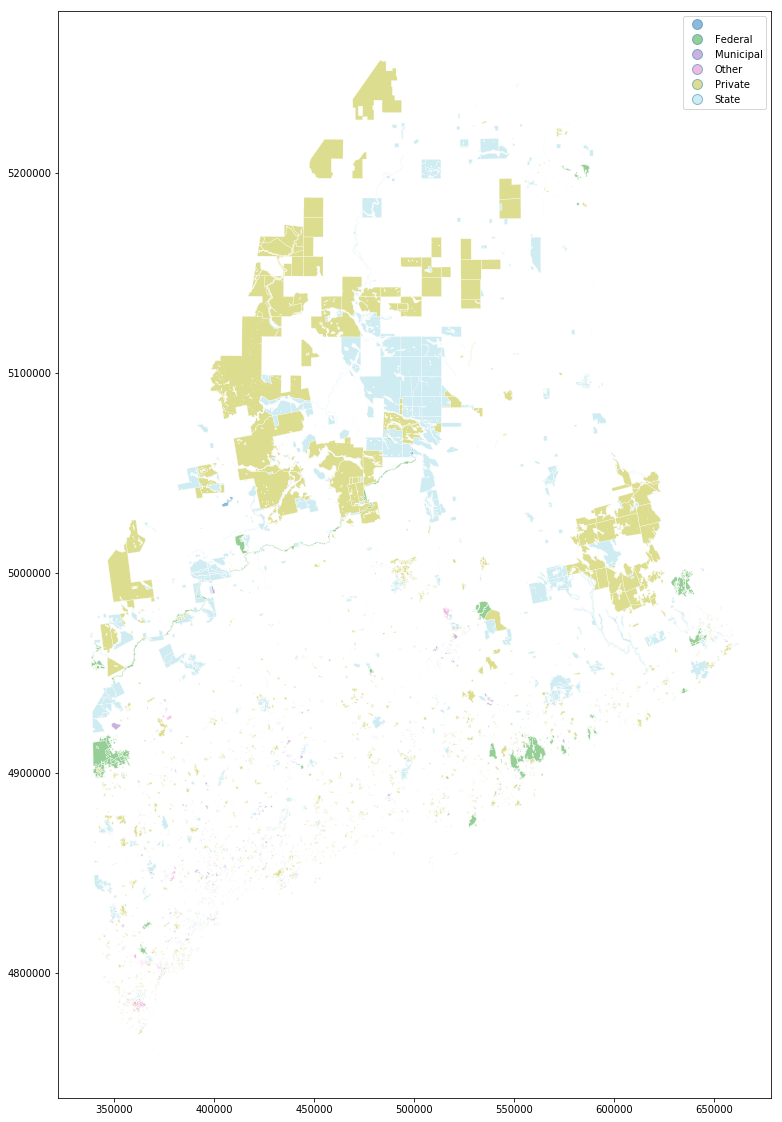

In [18]:
megis_copy['geometry'] = megis_one.geometry.simplify(50)
megis_copy.plot(column='HOLD1_TYPE', figsize=(20,20), linewidth=0.25, edgecolor='white', legend=True, cmap='tab20')
plt.savefig('maine_all_lands_pub_priv_simpified.svg')

In [ ]:

ax = megis_one.plot(column='HOLD1_TYPE', figsize=(20,20), linewidth=0.25, edgecolor='white', legend=True, cmap='tab20')
plt.savefig('maine_all_lands_pub_priv_3.svg')

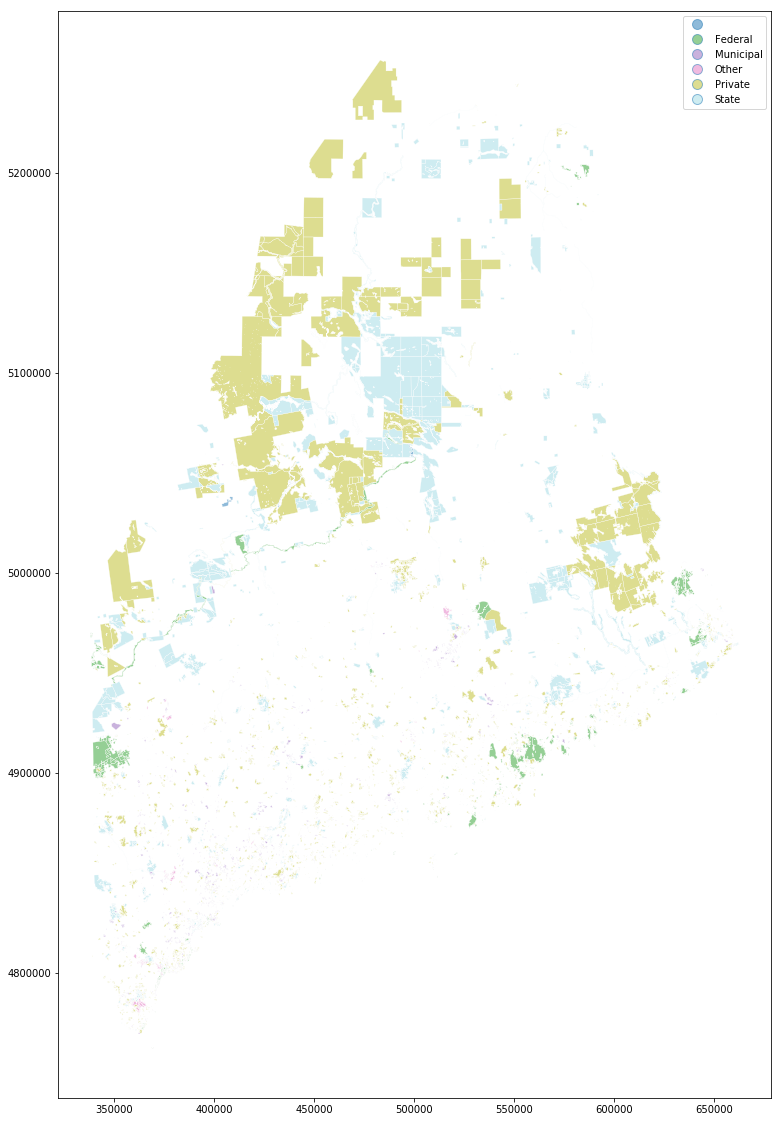

In [11]:
ax = megis_one.plot(column='HOLD1_TYPE', figsize=(20,20), linewidth=0.25, edgecolor='white', legend=True, cmap='tab20')
plt.savefig('maine_all_lands_pub_priv_3.svg')

In [ ]:
megis_one['HOLD1_TYPE'].value_counts()

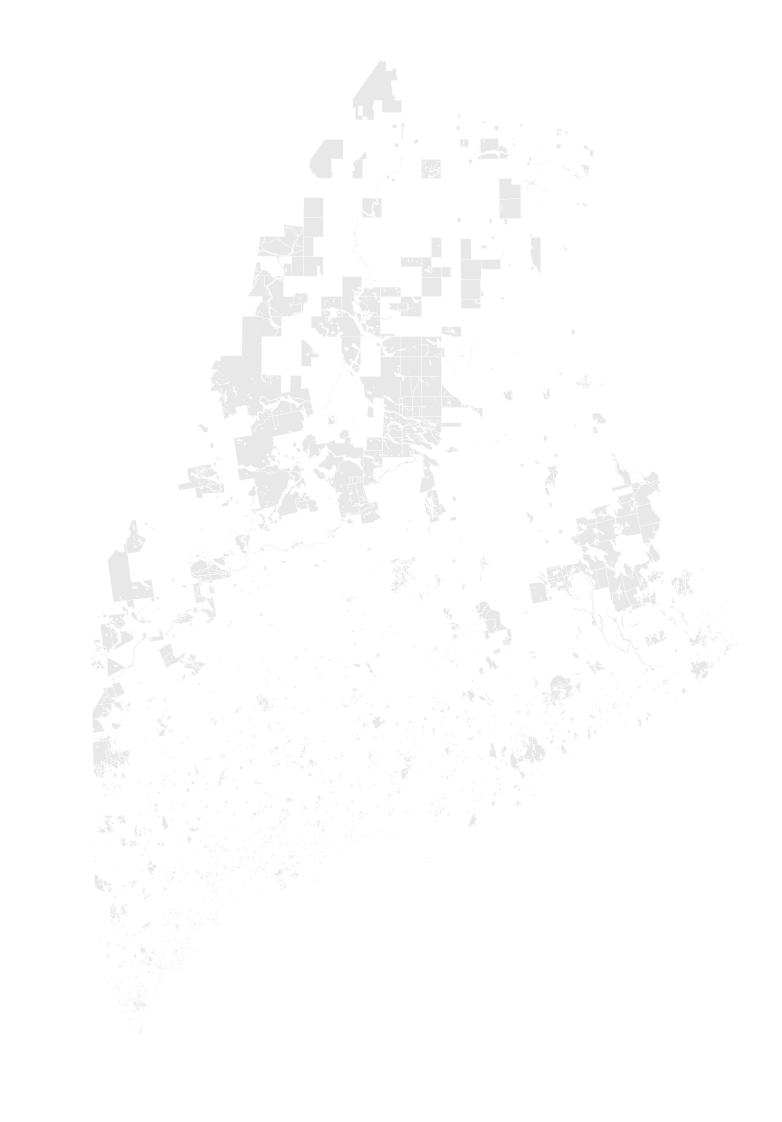

In [6]:
ax = megis_one.plot(figsize=(20,20), linewidth=0.25, edgecolor='white', color='lightgrey')
ax.axis('off')
plt.savefig('maine_all_lands.pdf')

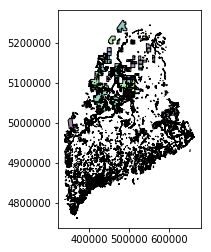

In [4]:
megis_one.plot()

In [8]:
megis_one['HOLD1_NAME'].value_counts().head(100)

Maine Minor Civil Division                                    2008
Maine Bureau of Parks and Lands                               1446
Maine Department of Inland Fisheries and Wildlife             1411
US Fish and Wildlife Service                                  1270
Maine Coast Heritage Trust                                     496
US National Park Service                                       400
The Nature Conservancy                                         312
                                                               252
Maine Farmland Trust                                           207
New England Forestry Foundation, Inc.                          180
Blue Hill Heritage Trust                                       130
Great Works Regional Land Trust                                123
Kennebunkport Conservation Trust                               121
Baxter State Park Authority                                    109
Downeast Coastal Conservancy                                  

In [10]:
megis_one[megis_one['HOLD1_TYPE'] == 'Municipal']

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
394,None,2009,,1.258249,395,Easement,Easement,,,,Janet Parker,screendig-feature was drawn using a mouse and ...,2009-10-07,4,Maine Minor Civil Division,Municipal,Maine Department of Marine Resources,State,,,40503000,shape digitized from survey map; CAP,Isle Au Haut Town Landing,Isle Au Haut Town Landing,"Allowed for general uses, contact owner for de...",Land conserved specifically to allow fishermen...,Refers to any type of public water access - sw...,,0.6,"POLYGON ((528853.7861000001 4880053.387399999,..."
761,1995-08-02,1995,,1.084342,763,Fee,Public Access Easement,,Public Access Easement,,Gwen Kozlowski,dig-digitizes or converts spatial features on ...,2009-12-02,4,Maine Minor Civil Division,Municipal,Maine Department of Inland Fisheries and Wildlife,State,0709001,,,Digitized from georeferenced survey (1996) gk,Chamber Site,Piscataquis River Access - Dover,Contact landowner for additional information,,,,0.5,"POLYGON ((481963.0499 5003277.0748, 481914.492..."
1316,None,,,17.208359,1320,Fee,Easement,,National Park Easement,,Ellen Jackson,copy-duplicates features and INFO files to a n...,2009-11-04,2,Maine Minor Civil Division,Municipal,US National Park Service,Federal,,,,Acadia National Park easement,,,,,,y,0.0,"POLYGON ((547433.9937000005 4903399.4924, 5474..."
1353,None,,,4.476634,1357,Fee,Easement,,National Park Easement,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2009-11-04,2,Maine Minor Civil Division,Municipal,US National Park Service,Federal,,,,Acadia National Park easement,,,,,,y,0.0,"POLYGON ((548028.4363000002 4903568.425000001,..."
2263,None,,,96.997420,2275,Fee,Easement,,Conservation Easement,,Gwen Kozlowski,"put-copies selected features, coordinate infor...",2010-03-24,3,Maine Minor Civil Division,Municipal,Mahoosuc Land Trust,Private,,,,Copied shapefile from Mahoosucs Land Trust,,Maggie Ring Easement,Contact landowner for additional information,,,,0.0,"POLYGON ((365577.6205000002 4915595.950200001,..."
2444,1995-08-02,1995,,0.460424,2456,Fee,Public Access Easement,,Public Access Easement,,Gwen Kozlowski,dig-digitizes or converts spatial features on ...,2009-12-02,4,Maine Minor Civil Division,Municipal,Maine Department of Inland Fisheries and Wildlife,State,0709002,,,Digitized from MEGIS parcels; snapped to road ...,East Dover Bridge,Piscataquis River Access - Dover,Contact landowner for additional information,,,,0.5,"POLYGON ((486741.5577999996 5003623.9781, 4867..."
2850,2008-12-18,,,31.457802,2868,Fee,Easement,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Minor Civil Division,Municipal,Brunswick-Topsham Land Trust,Private,,,,Drawn from tax map; no survey available; data ...,Rogers Property,Rogers Property,"Allowed for general uses, contact owner for de...",,,,32.0,"POLYGON ((425336.3915999997 4867356.839, 42518..."
2898,None,,,0.550831,2916,Fee,Easement,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Minor Civil Division,Municipal,Damariscotta River Association,,,,,Data provided by the Sheepscot Valley Conserva...,Buck Property,Buck Property,"Not allowed - by law, for safety reasons,",,,,0.0,"POLYGON ((455652.3936999999 4871567.5425, 4556..."
2993,None,,,19.166812,3012,Fee,,,Nature Preserve / Reserve / Sanctuary,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,4,Maine Minor Civil Division,Municipal,,,,,,Data provided by the City of Bangor,Brown Woods,Brown Woods,Contact landowner for additional information,,,,0.0,"POLYGON ((514332.4310999997 4964275.1051, 5140..."
2994,None,,,17.231610,3013,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,4,Maine Minor Civil Division,M

In [7]:
megis_one['CALC_AC'].value_counts()

0.040771        1
0.415431        1
261.380923      1
73.863724       1
37.915419       1
30.024178       1
120.024518      1
605.804132      1
1.833899        1
33.240689       1
0.107412        1
6.885117        1
0.020101        1
19.588625       1
3.067735        1
377.167422      1
4.353916        1
163.642359      1
1338.794234     1
20.850096       1
74.355629       1
1.131770        1
49.112723       1
18.383001       1
29.335660       1
2.187252        1
3185.396181     1
6.426091        1
0.684202        1
1.588603        1
               ..
15.652218       1
32.071880       1
1539.048937     1
16.038852       1
201.718862      1
2.286283        1
69.793561       1
14.558561       1
2.071281        1
3.119731        1
16.114608       1
1.025898        1
73.916845       1
125.893711      1
0.272960        1
2.420936        1
2.351877        1
5.312580        1
54570.600808    1
10.727736       1
71.970149       1
22.535686       1
13.529897       1
101.853083      1
61.535533 

In [4]:
megis_one['CALC_AC'].sum()

4012414.6050746702

In [27]:
megis_one['HOLD1_TYPE'].value_counts()

Private      3673
State        3088
Municipal    2021
Federal      1772
Other         249
               28
Name: HOLD1_TYPE, dtype: int64

In [21]:
megis_grouped = megis_one.groupby('HOLD1_TYPE')['CALC_AC'].sum()
type(megis_grouped)


pandas.core.series.Series

In [22]:
megis_grouped_df = megis_grouped.to_frame()
megis_grouped_df.head()

,CALC_AC
HOLD1_TYPE,
,5.091229e+03
Federal,2.027507e+05
Municipal,4.022447e+04
Other,1.470937e+04
Private,2.382877e+06


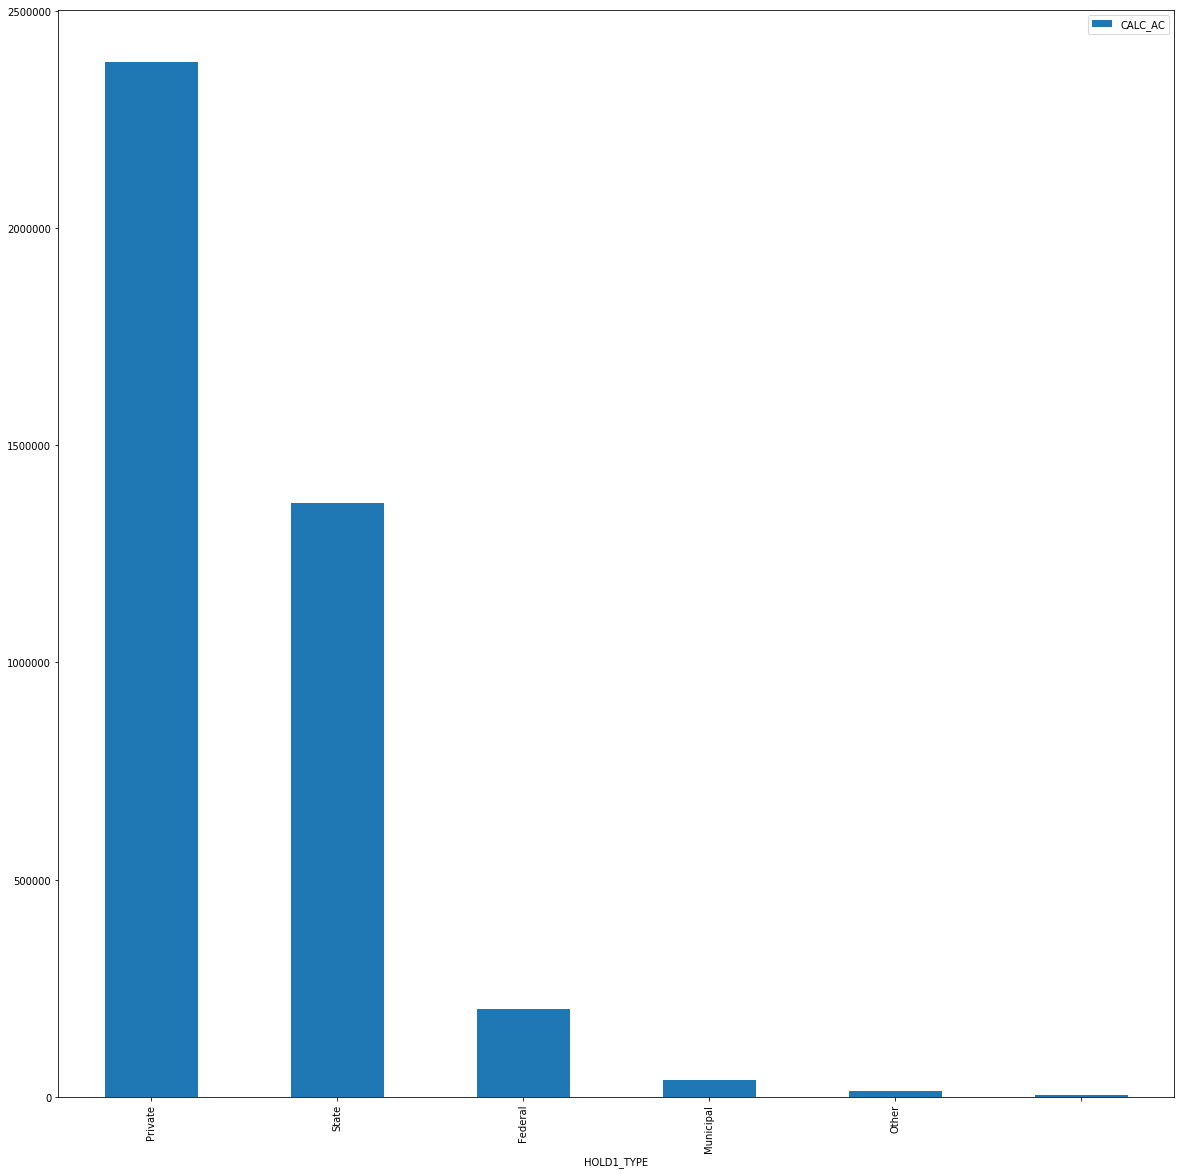

In [26]:
megis_grouped_df.sort_values(by='CALC_AC', ascending=False).plot(kind='bar', figsize=(20,20))
plt.savefig('megis_grouped_bar.pdf')

In [13]:
# megis_one[megis_one['HOLD1_TYPE'].str.contains('Other')]

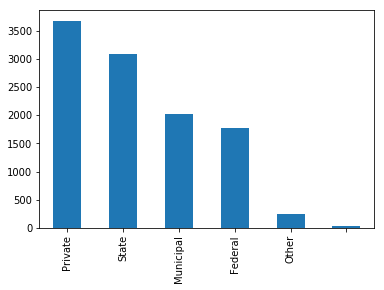

In [9]:
megis_one['HOLD1_TYPE'].value_counts().plot(kind='bar', stacked=True)

In [11]:
# conservation_trusts.shape()

In [12]:
#what're the columns?
megis_one.columns

Index(['ACQ_DATE', 'ACQ_YEAR', 'BPL_ID', 'CALC_AC', 'CL_UNIQUEI', 'CONS1_TYPE',
       'CONS2_TYPE', 'DEPT_ID', 'DESIGNATIO', 'ECO_RESERV', 'EDITOR',
       'FMPROCSS', 'FMUPDDAT', 'GAP_STATUS', 'HOLD1_NAME', 'HOLD1_TYPE',
       'HOLD2_NAME', 'HOLD2_TYPE', 'IFW_ID', 'IUCN_STATU', 'LMF_ID', 'NOTE_',
       'PARCEL_NAM', 'PROJECT', 'PUB_ACCESS', 'PURPOSE1', 'PURPOSE2', 'REVIEW',
       'RPT_AC', 'geometry'],
      dtype='object')

In [13]:
#what are the designations?
megis_one['DESIGNATIO'].value_counts().head()

                                  3761
Miscellaneous Municipal Lands     1568
National Wildlife Refuge          1251
State Wildlife Management Area     917
Coastal Island                     566
Name: DESIGNATIO, dtype: int64

## Why are there some missing? Contact MEGIS!

In [ ]:
#let's plot the designation types
counts = megis_one['DESIGNATIO'].value_counts().head(10)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]

ax = counts.plot(kind='bar', fontsize=17,colors=colors, figsize=(20,20))
fig = ax.get_figure()
fig.savefig('preserve_types_bar.png')

In [15]:
# counts = megis_one['DESIGNATIO'].value_counts().head(10)
# plt.axis('equal')
# colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
# counts.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# # plt.legend(labels=group_names,loc="DESIGNATIO")
# plt.show()
# plt.savefig('preserve_types.png')

# # explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6)

# # counts.plot(kind='pie', fontsize=17,colors=colors,explode=explode)


In [16]:

# ax = megis_one['DESIGNATIO'].value_counts().head(10).plot.pie(figsize=(20,10))
# ax.plot()
# ax.savefig('preserve_types_pie.pdf')

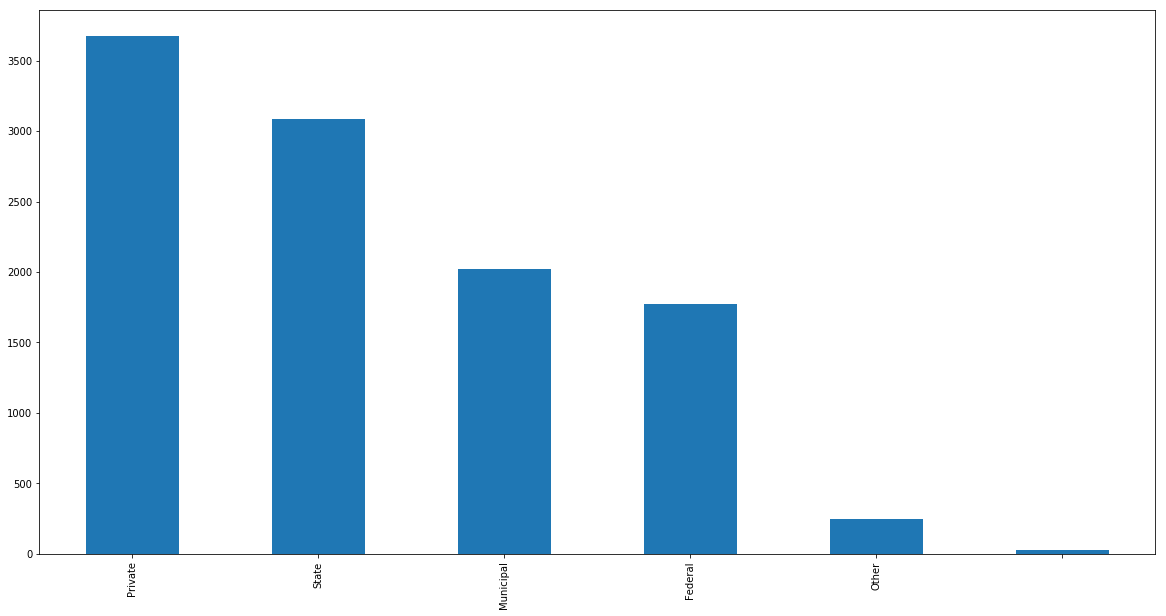

In [17]:
#are most of the holdings federal, state or private?
entity = megis_one['HOLD1_TYPE'].value_counts()
ax = entity.plot(kind='bar', figsize=(20,10))
fig = ax.get_figure()
fig.savefig('entity_bar.png')

In [18]:
megis_one['CONS1_TYPE'].value_counts()

Fee                              8297
Easement                         2212
Management Transfer Agreement     245
Public Access Easement             41
                                   20
Restricted                          8
Lease                               4
Third Party Easement                2
Other                               1
Easement Enforcer                   1
Name: CONS1_TYPE, dtype: int64

In [28]:
megis_one['HOLD1_NAME'].value_counts()

Maine Minor Civil Division                                 2008
Maine Bureau of Parks and Lands                            1446
Maine Department of Inland Fisheries and Wildlife          1411
US Fish and Wildlife Service                               1270
Maine Coast Heritage Trust                                  496
US National Park Service                                    400
The Nature Conservancy                                      312
                                                            252
Maine Farmland Trust                                        207
New England Forestry Foundation, Inc.                       180
Blue Hill Heritage Trust                                    130
Great Works Regional Land Trust                             123
Kennebunkport Conservation Trust                            121
Baxter State Park Authority                                 109
Downeast Coastal Conservancy                                 95
Forest Society of Maine                 

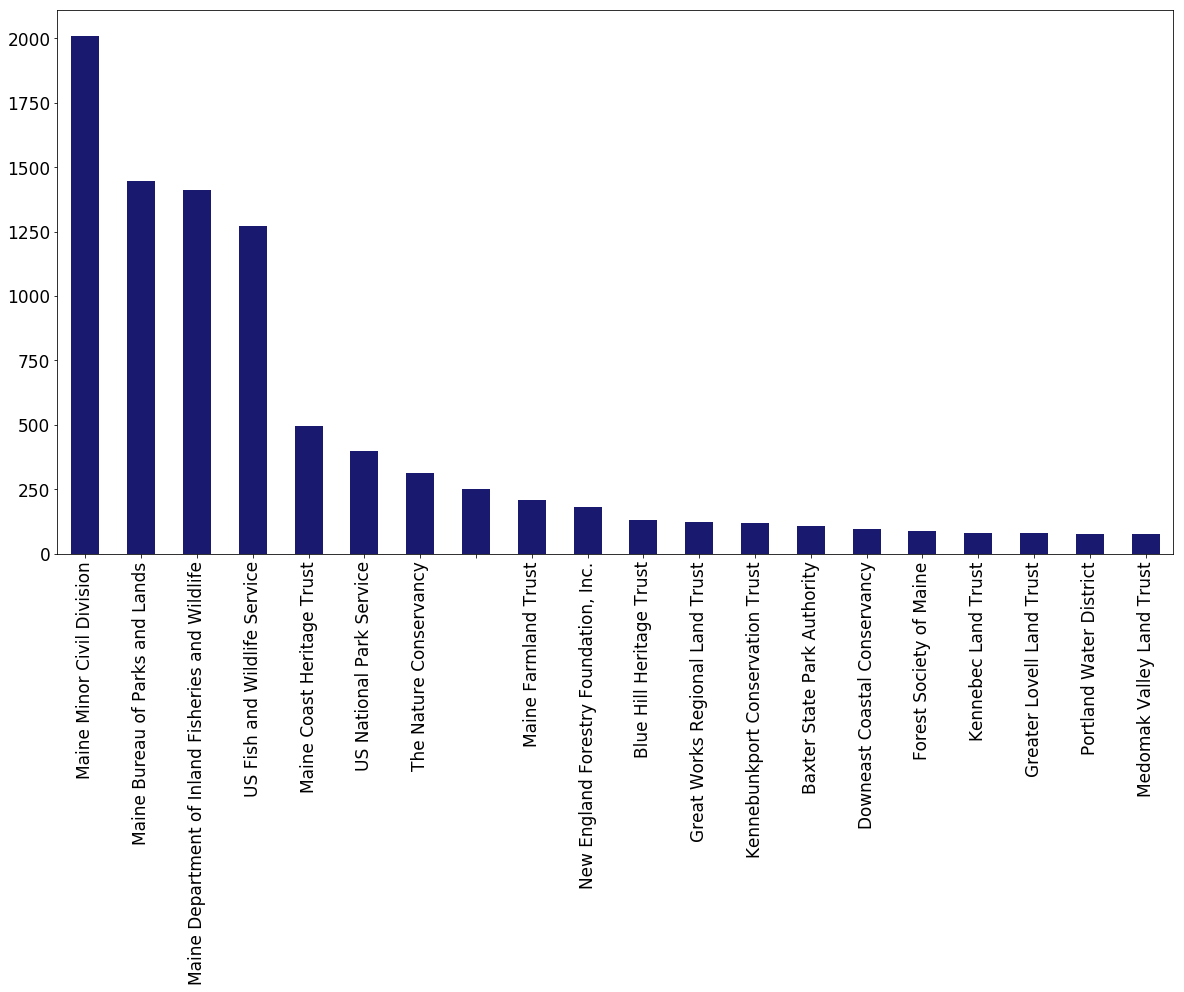

In [19]:
#which organizations manage the most parcels?
holders = megis_one['HOLD1_NAME'].value_counts().head(20)
color = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax = holders.plot(kind='bar', fontsize=17, color=color, figsize=(20,10))
fig = ax.get_figure()
fig.savefig('land_holder_bar.png')

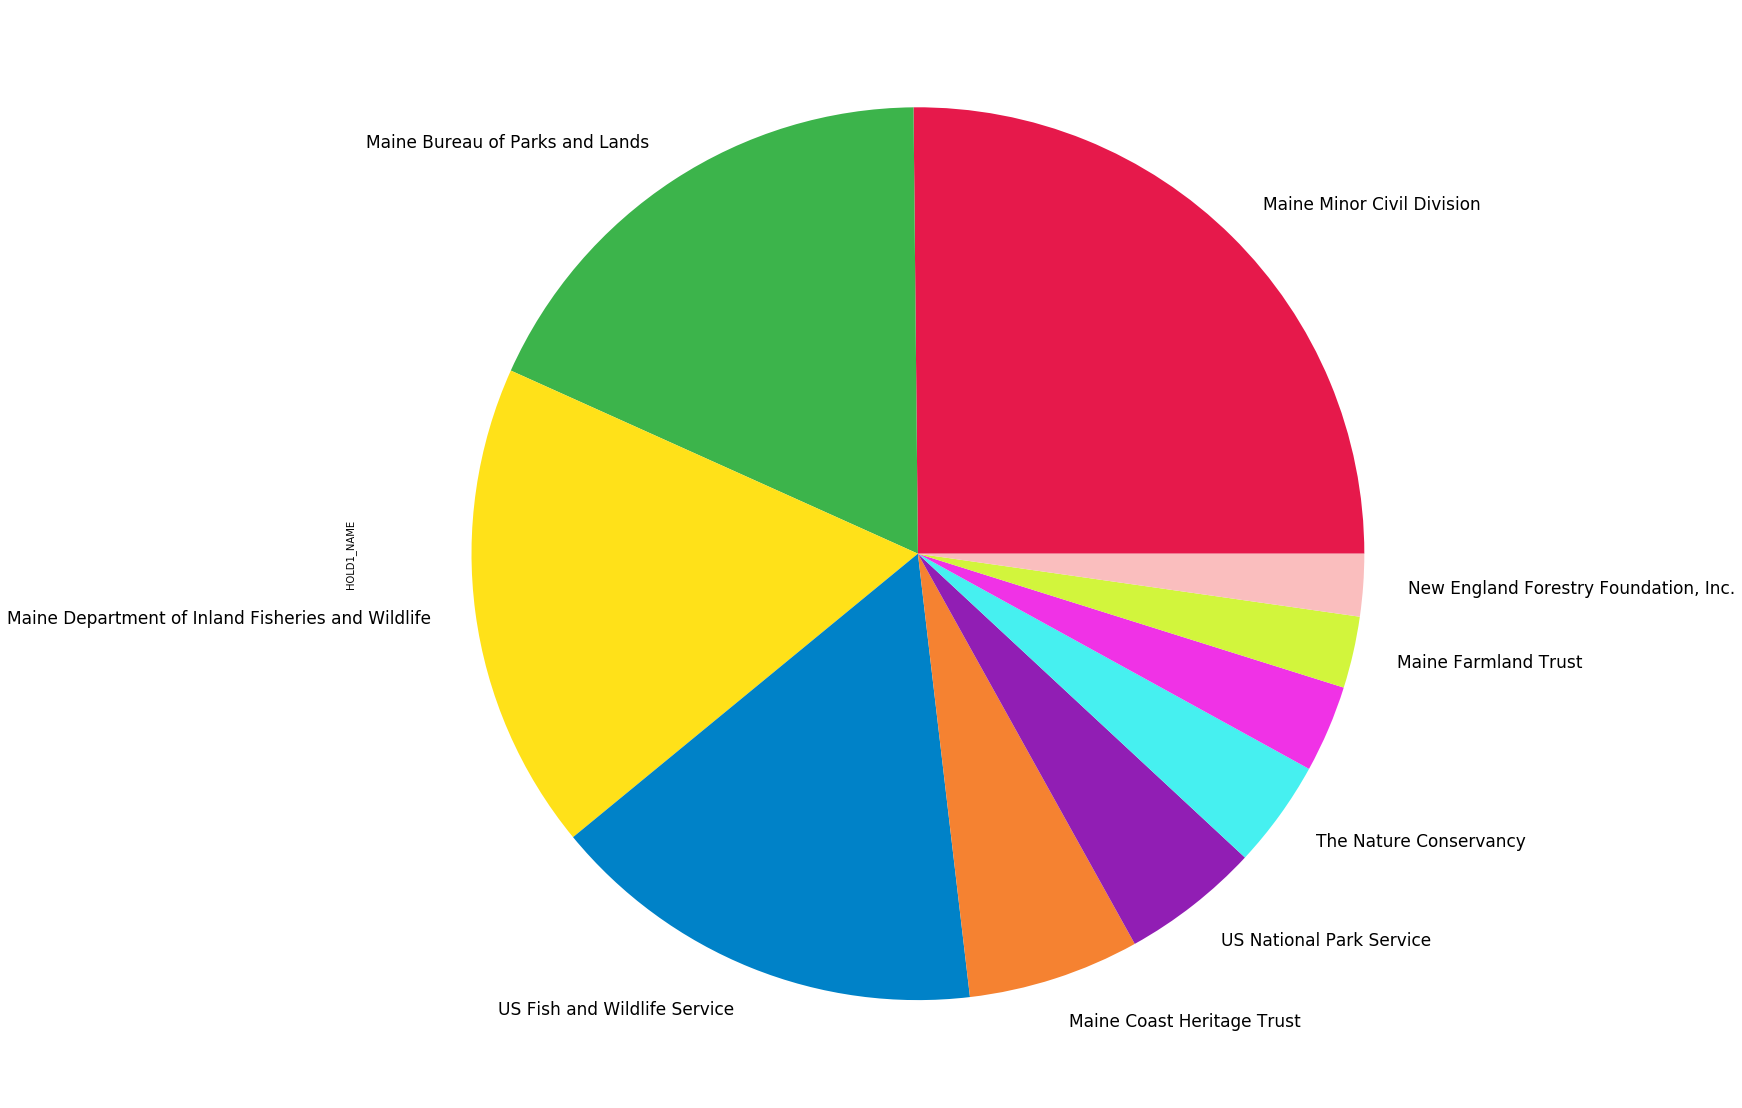

In [22]:
holders = megis_one['HOLD1_NAME'].value_counts().head(10)
plt.axis('equal')
colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe',"#008080",'#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF','#000000']
ax = holders.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# plt.legend(labels=group_names,loc="DESIGNATIO")
fig = ax.get_figure()
fig.savefig('land_holder_pie2.png')


KeyboardInterrupt: 

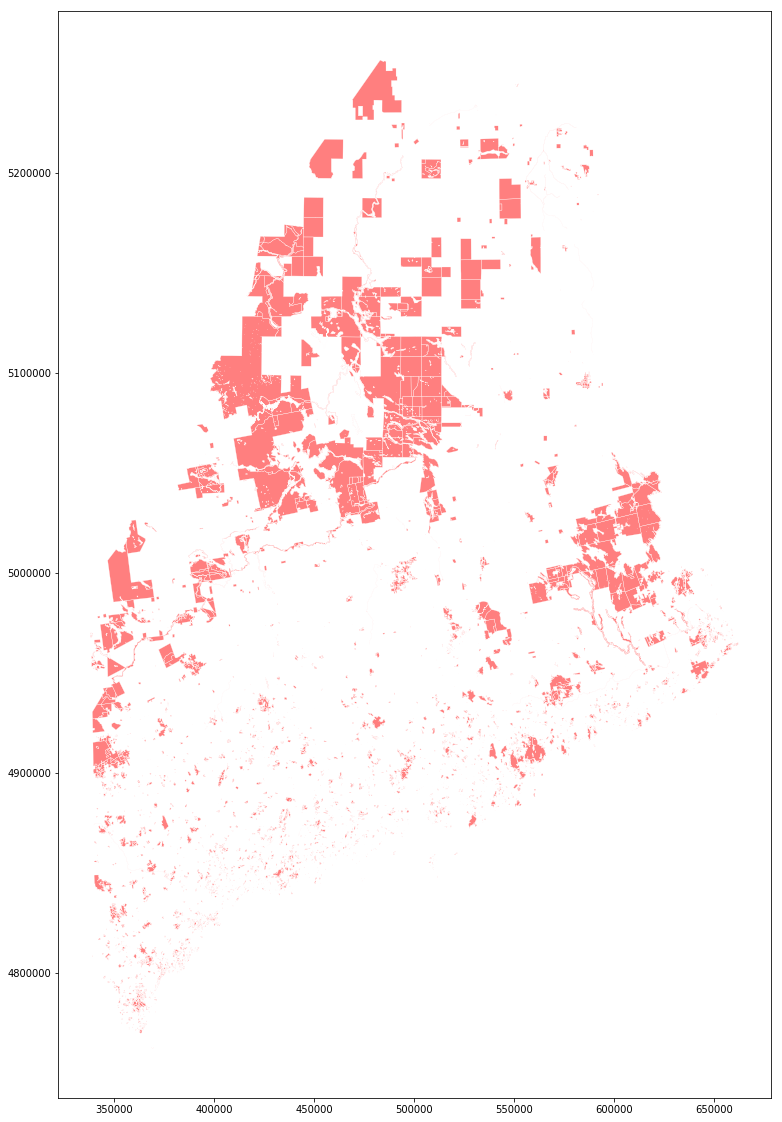

In [21]:
#let's map all of them using the shapefile
ax = megis_one.plot(color='red', linewidth=0.25, edgecolor='white', figsize=(20,20))
ax.plot()
ax.savefig('megis_one.png')



### After scraping info from MLTN (a subsidiary of MCHT), I cleaned the file in excel and then reuploaded it below. see maine_conservation_scraping notebook for info

In [ ]:
#I cleaned the file a little in excel
#because I find that easier sometimes
#so let's re-import it

mltn_scraped = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/maine_conservation_lands/maine_land_trust_info.csv')
mltn_scraped.head(50)

In [ ]:
#make sure it's still the same leng
len(mltn_scraped)

In [ ]:
#so the next step is to join the geodataframe megis_one with the df with all the trust info
#on the name column
#then you can create a nice map with all that info

In [ ]:
#first thing to do is reset the index on the 
#spatial dataframe so 

In [ ]:
# megis_one.rename(columns={'HOLD1_NAME': 'name'}, inplace=True)
# megis_one.head()

In [ ]:
# # continental.merge(obesity, left_on='NAME', right_on='statename')

# joined = megis_one.merge(mltn_scraped, left_on='name', right_on='name')
# joined.head(100)

In [ ]:
# joined.shape

In [ ]:
#then color it by the name of the trust

In [ ]:
# mft = joined[joined['name'] =='Maine Farmland Trust']
# mft['geometry'].plot()

In [ ]:
# mcht = joined[joined['name']=='Maine Coast Heritage Trust']
# mcht.head(496)

In [ ]:
# pd.set_option("display.max_rows", 100)
# mcht.head(500)

In [ ]:
# mcht.to_csv("mcht_only_from_joined_dataset.csv", index=False)


In [ ]:
# mcht['geometry'].plot(figsize=(20,20))

### Below is the shapefile for the actual state of Maine if we need it.

In [ ]:
# maine = gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/maine_shapefile/Cnty24L.shp')

In [ ]:
# maine.head()

In [ ]:
# maine.plot()

In [ ]:
# ax = maine.plot(figsize=(25,10), color='#A9A9A9')

# mcht.plot(figsize=(25,20),ax=ax)
# ax.axis('off')
# # ax.savefig('mchtonly.png')

In [ ]:
# #plot the joined dataframe on top of the map of maine
# #coloring by the name column, ie by the trust/govt entity that controls it
# ax = maine.plot(figsize=(20,20), color='#A9A9A9')

# joined.plot(column='name', cmap='autumn_r', figsize=(20,20), ax=ax)
# ax.axis('off')
ax.savefig('maine_conservation.png')

In [ ]:
megis_one.head()

In [ ]:
megis_one.shape

In [2]:
#here's the info from Bob Bistrais with the updated holding 
megis_two = gpd.read_file('/Users/kaitlincough/Documents/data_studio/big_files_that_make_github_sad/shapefiles/megis_conserved_lands_new/conserved_landss_new/ConservedLands.shp')

In [3]:
megis_two.head()

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,...,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,Shape_STAr,Shape_STLe,TAX_MAP_BO,TAX_MAP_TO,geometry
0,None,1965,,8.314696,1,F,,,NAT,,...,A,Conservation/Wildlife,,,0.000,33648.380756,878.782412,,,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
1,None,,,52.293330,2,F,,,,,...,C,,,,52.292,211623.602097,1966.799575,,,"POLYGON ((542053.9376999997 5089059.000499999,..."
2,None,2001,,1.816991,4,E,,,,,...,C,,,,1.817,7353.103227,379.180470,,,"POLYGON ((492307.3439999996 5140590.4999, 4923..."
3,None,2001,,0.084249,5,E,,,,,...,C,,,,0.085,340.941805,83.147275,,,"POLYGON ((531716.8749000002 5134688.4998, 5317..."
4,1989-09-06,1989,,30.675615,6,E,,,CE,,...,C,,,,37.000,124139.807726,2453.458032,,,"POLYGON ((583480.4373000003 5176787.9998, 5834..."


In [ ]:
megis_two.shape

In [4]:
pd.set_option("display.max_columns", 100)
megis_two.head()

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,GlobalID,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,OBJECTID,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,Shape_STAr,Shape_STLe,TAX_MAP_BO,TAX_MAP_TO,geometry
0,None,1965,,8.314696,1,F,,,NAT,,LUPC,,None,2,{5455AADD-84F9-4715-8C06-05E8417D2E92},tnc,P,,,,,,MEFO File Survey; CAP,1,,La Verna Preserve,A,Conservation/Wildlife,,,0.000,33648.380756,878.782412,,,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
1,None,,,52.293330,2,F,,,,,,,None,4,{E3502C95-6B2B-447B-BF6D-063963651B10},medot,S,,,,,,Roadside Rest Area,2,ASH HILL,ASH HILL SCENIC AREA,C,,,,52.292,211623.602097,1966.799575,,,"POLYGON ((542053.9376999997 5089059.000499999,..."
2,None,2001,,1.816991,4,E,,,,,,,None,3,{67C872E9-707F-42CC-BFAC-E3209A076E57},neff,P,,,,,,,4,PINGREE EASEMENT,PINGREE EASEMENT,C,,,,1.817,7353.103227,379.180470,,,"POLYGON ((492307.3439999996 5140590.4999, 4923..."
3,None,2001,,0.084249,5,E,,,,,,,None,3,{5516CF27-CB07-46E5-B427-043ECC8967E5},neff,P,,,,,,,5,PINGREE EASEMENT,PINGREE EASEMENT,C,,,,0.085,340.941805,83.147275,,,"POLYGON ((531716.8749000002 5134688.4998, 5317..."
4,1989-09-06,1989,,30.675615,6,E,,,CE,,MNAP_chris,put,2009-07-16,3,{E5B1AAF2-3FC2-448C-A8BD-640D1254D965},meifw,S,,,0013001,,,Digitized boundaries from georeferenced 1973 s...,6,McBurnie Property,Conant Brook,C,,,,37.000,124139.807726,2453.458032,,,"POLYGON ((583480.4373000003 5176787.9998, 5834..."


In [ ]:
megis_two.plot()

In [ ]:
megis_two.columns

In [ ]:
#let's join the old MEGIS shapefile (with full names)
#with the new one, using the CL_UNIQUEI column
joined2 = megis_one.merge(megis_two, on='CL_UNIQUEI', how='outer')
joined2.head()

In [ ]:
joined2.shape

In [ ]:
megis_one.shape

In [ ]:
megis_two.shape

In [ ]:
mcht = joined2[joined2['HOLD1_NAME_x']=='Maine Coast Heritage Trust']
mcht.head(496)

In [ ]:
mcht.shape

In [ ]:
pd.set_option('display.max_rows',100)
mcht[mcht['PROJECT_x'].str.contains('sea*')==True]


In [ ]:
mcht.plot(x='ACQ_YEAR_x', y='CALC_AC_x', figsize=(20,10))

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

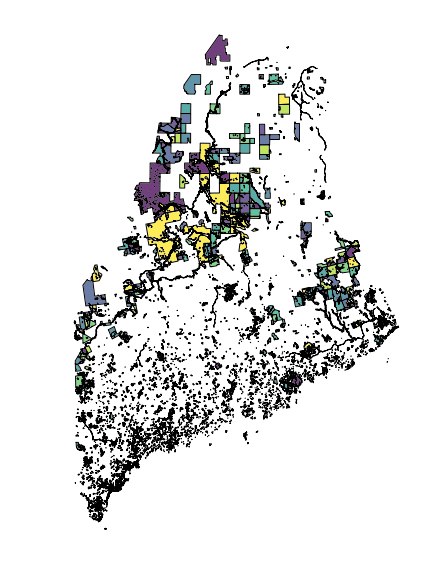

In [7]:
ax = megis_two.plot(figsize=(25,10), edgecolor='white')
megis_two.plot(figsize=(25,10), ax=ax)
ax.axis('off')
ax.savefig('maine_map.pdf')

In [ ]:
ax = megis_two.plot(linewidth=0.25, edgecolor='white', figsize=(20,20))
ax.savefig('megis_one.pdf')